# gem5 HBM Models Plots

In [1]:
%matplotlib notebook
import pandas as pd
from plotnine import *

datadir = 'C:/Users/maryam/Desktop/hbmTest/stats'

In [2]:
def getStat(filename, stat):
    try:
        with open(filename) as f:
            readlines = f.readlines()
            for l in readlines:
                if stat in l:
                    return l
            return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0

In [3]:
Stats = ['hostSeconds',
         'system.processor.cores.generator.numSuppressed', 'system.processor.cores.generator.numPackets',
         'system.processor.cores.generator.numRetries', 'system.processor.cores.generator.retryTicks',
         'system.processor.cores.generator.bytesRead', 'system.processor.cores.generator.bytesWritten',
         'system.processor.cores.generator.totalReadLatency', 'system.processor.cores.generator.totalWriteLatency',
         'system.processor.cores.generator.totalReads', 'system.processor.cores.generator.totalWrites',
         'system.processor.cores.generator.avgReadLatency', 'system.processor.cores.generator.avgWriteLatency',
         'system.processor.cores.generator.readBW', 'system.processor.cores.generator.writeBW',
         'system.memory.mem_ctrl0.dram.busUtil', 'system.memory.mem_ctrl0.dram.busUtilRead', 
         'system.memory.mem_ctrl0.dram.busUtilWrite']

HBM_Type = ['SingleChannelHBM_DDR3', 'HBM2Stack_8Channels', 'HBM2Stack_16Channels']
Pattern = ['Linear', 'Random']
Read_Percentage = ['RO', 'WO']


In [4]:
rows = []

for dev in HBM_Type:
    for rds in Read_Percentage:
        for pat in Pattern:
            stats = [dev, rds, pat]
            for stat in Stats:
                time_file_path = '{}/{}/{}_{}/stats.txt'.format(datadir, dev, rds, pat)
                ret_line = getStat(time_file_path,stat)
                if ret_line != 0:
                    stat_val = ret_line.split()[1]
                else:
                    stat_val = 1
                stats.append(stat_val)
            rows.append(stats)


df = pd.DataFrame(rows, columns=['HBM_Type','Read_Percentage','Pattern',
                                 'hostSeconds',
                                 'numSuppressed', 'numPackets', 'numRetries', 'retryTicks',
                                 'bytesRead', 'bytesWritten', 'totalReadLatency', 'totalWriteLatency',
                                 'totalReads', 'totalWrites', 'avgReadLatency', 'avgWriteLatency',
                                 'readBW', 'writeBW',
                                 'dramBusUtil', 'dramBusUtilRead', 'dramBusUtilWrite'])

df['totBW'] = (df['readBW'].astype(float) + df['writeBW'].astype(float))/(1024*1024*1024)
#df.to_csv("hbmTest.csv")
#print(df)


In [5]:
def doplot_stat(stat):
    strY = stat
    if stat == "totBW":
        strY = "Total BW (GB/s)"
    elif stat == "dramBusUtil":
        strY = "DRAM Bus Utilization (%)"
        
    print(strY)
        
    plot = (ggplot(df, aes(x='Read_Percentage', y=stat, fill='HBM_Type'))
    + geom_col(stat='identity', position='dodge')
    + facet_wrap('Pattern')
    + theme(
        panel_background=element_rect(fill="gray", alpha=.2),
        legend_key_width=2,
        legend_position = "top",
        legend_box_spacing = 0
        )
    + xlab("Read/Write Percentage")
    + ylab(strY)
    )
    return plot


Total BW (GB/s)


<IPython.core.display.Javascript object>


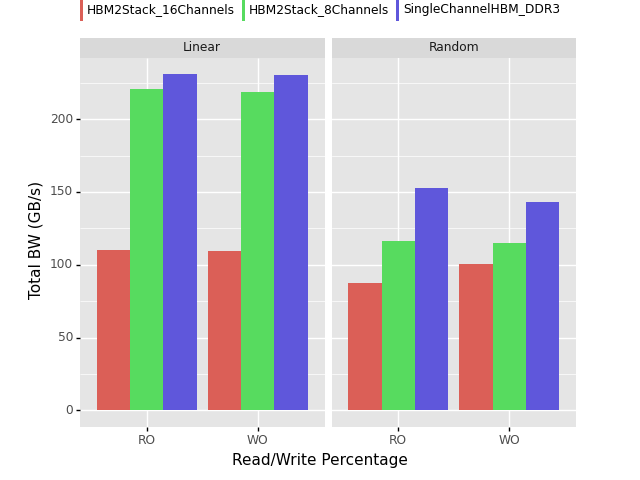

<ggplot: (169918973257)>

In [6]:
doplot_stat('totBW')

DRAM Bus Utilization (%)


<IPython.core.display.Javascript object>


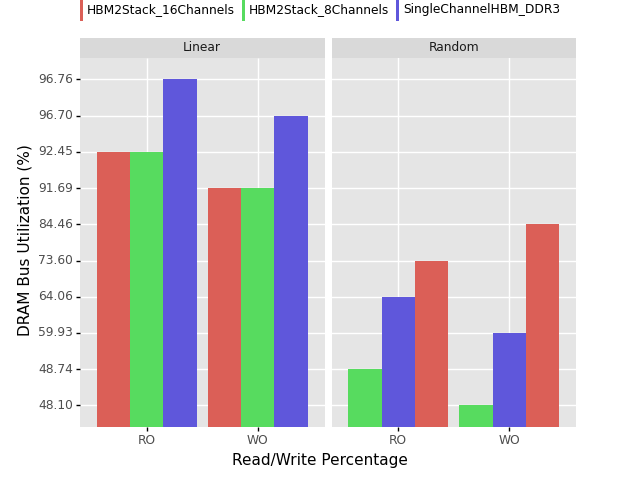

<ggplot: (169785726967)>

In [7]:
doplot_stat('dramBusUtil')